In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import needell_ssnmf
from needell_ssnmf import Needell_SSNMF

import display_ssnmf
from display_ssnmf import *


In [ ]:
data = LymeData({CHRONIC, NEURO},{SYMPTOMS},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Needell_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr,_ = ssnmf.gridsearch(param_range={'k': range(7,13),'lambda': list(np.linspace(0,1,100)), 'random_state': range(0,100)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)

print('CNS1 Working Definition: Neuro vs Non-Neuro')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

display_distr(accu_distr)
display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')

names = SYMPTOMS
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(3598, 14)
Index(['Fatigue', 'Headache', 'Joint Pain', 'Muscle aches', 'Neuropathy',
       'Twitching', 'Memory Loss', 'Cognitive Impairment', 'Sleep Impairment',
       'Psychiatric', 'Heart related', 'Gastrointestinal', 'neuro',
       'non_neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [ ]:
print(ssnmf)

In [ ]:
print(best_accuracy)

In [ ]:
print(test_accuracy)

In [8]:
print('CNS1 Working Definition: Neuro vs Non-Neuro')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

CNS1 Working Definition: Neuro vs Non-Neuro
best accuracy:  0.729318236714976  best params:  {'k': 11, 'lambda': 0.30303030303030304, 'random_state': 64}
test_accuracy:  0.7125


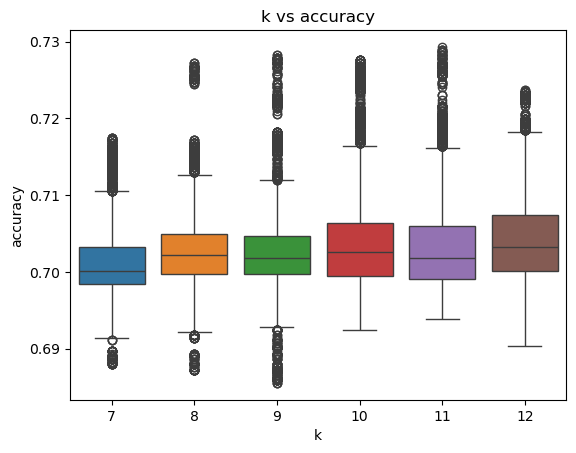

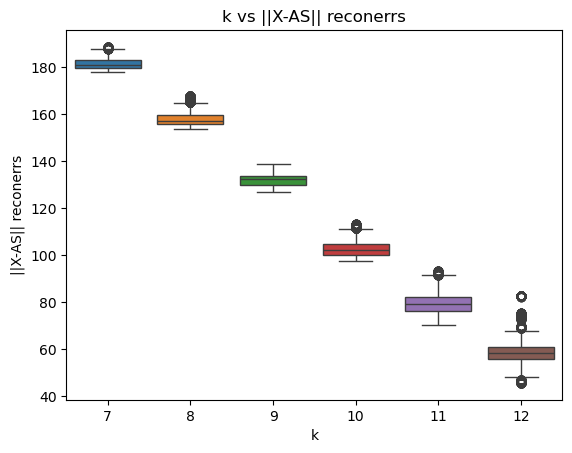

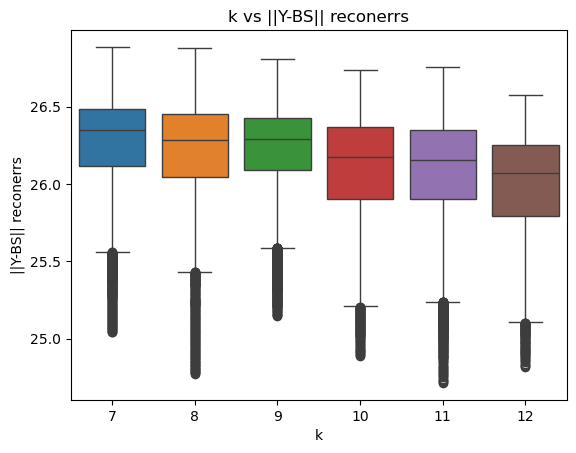

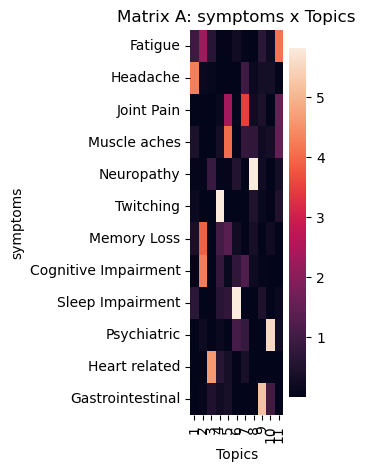

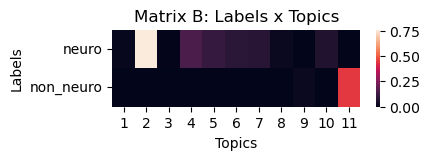

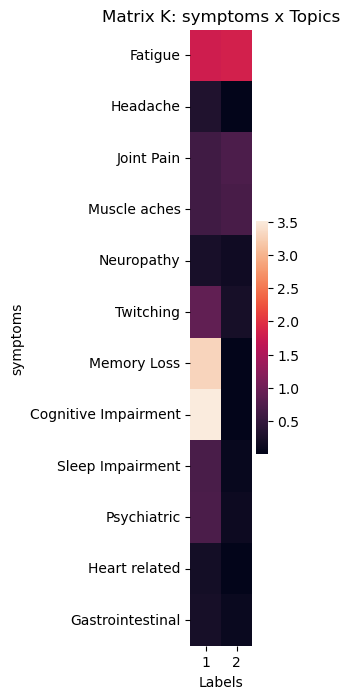

In [9]:
display_distr(accu_distr)
display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')

names = SYMPTOMS
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)

In [19]:
accu_distr.to_csv('CNS1_NvN_Sym_ND_k_large_accu_distr.csv', index=False)
Xreconerr_distr.to_csv('CNS1_NvN_Sym_ND_k_large_Xreconerr_distr.csv', index=False)
Yreconerr_distr.to_csv('CNS1_NvN_Sym_ND_k_large_Yreconerr_distr.csv', index=False)

In [15]:
# Accuracy distribution statistics
mean = accu_distr.mean()
Q1 = accu_distr.quantile(0.25)
Q3 = accu_distr.quantile(0.75)
print('Mean Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Accuracy:
7     0.701167
8     0.702638
9     0.702847
10    0.703958
11    0.703421
12    0.704140
dtype: float64
IQR:
7     0.004864
8     0.005212
9     0.004864
10    0.006947
11    0.006946
12    0.007296
dtype: float64


In [17]:
# Xreconerr distribution statistics
mean = Xreconerr_distr.mean()
Q1 = Xreconerr_distr.quantile(0.25)
Q3 = Xreconerr_distr.quantile(0.75)
print('Mean Xreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Xreconerr_distr:
7     181.530715
8     158.006151
9     132.148935
10    102.959471
11     79.673687
12     58.472936
dtype: float64
IQR:
7     3.177577
8     3.665546
9     3.820858
10    4.445879
11    6.104272
12    5.096376
dtype: float64


In [18]:
# Yreconerr distribution statistics
mean = Yreconerr_distr.mean()
Q1 = Yreconerr_distr.quantile(0.25)
Q3 = Yreconerr_distr.quantile(0.75)
print('Mean Yreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Yreconerr_distr:
7     26.280344
8     26.224744
9     26.225254
10    26.114967
11    26.092506
12    26.003043
dtype: float64
IQR:
7     0.369831
8     0.408617
9     0.335235
10    0.464586
11    0.444213
12    0.460405
dtype: float64
